In [16]:
#############################################################
# Compile `main.cu` to `file.exe`
# Commented out because we don't want to run it all the time
#############################################################
# !nvcc -w functions.cu main.cu -o file
!nvcc -w functions.cu main_sz.cu -o file

functions.cu
tmpxft_00000e50_00000000-10_functions.cudafe1.cpp
main_sz.cu
tmpxft_00000e50_00000000-14_main_sz.cudafe1.cpp
   Creating library file.lib and object file.exp


In [1]:
#############################################################
# Load python dependencies
# If package cannot be resolved from pylance, reload the interpreter
#############################################################
import numpy as np
import matplotlib.pyplot as plt
import utils
import os.path
import scipy.stats as stats
from matplotlib import rc

In [2]:
#############################################################
# Figure settings
#############################################################
plt.rcParams.update({'font.size': 13.2})
plt.rcParams["font.family"] = "Arial"
# Format
# fig = plt.figure()
# ax = fig.subplots(1, 1)
# plt.figure(figsize=(6.5,4.2))
# ax.set_title("Total atomic decay rate")
# ax.set_ylabel(r"dW/dt")
# ax.set_xlabel(r"Time ($\mu$s)")
# labels = [r"[0,$\delta$]", r"[0,$\delta/2$]", r"[0,$\delta/2$, $\delta$]"]
# ax.plot(...)
# ax.legend()
# fig.savefig(f"{}.pdf", dpi=300, pad_inches=0.2)

# Run simulation

To run a single system, use terminal: 

         k  n_tot theta,phi g gamma chi kap t_end t_num handle

file.exe 20 100000 0.5 0.0 1.6 0.0 0.0 160 0.5 600000 k20N5_0.5_0_kappa160

## Suggested file naming convention:
k{num_ens}N{order of magnitude of n_total}_{theta_phi}_{other params}

E.g., k5N5_1_0_kappa160

The below block of code is useful for running multiple jobs

# Sample input

In [17]:
#############################################################
# Sample input
#############################################################
detunings = [[50]]
thetas = [[0.5]] # Value between 0 and 1 for ground and excited
# Generate a list of detuning profile with k = 10,20,30,40,50
N_tot = 50000
theta_0 = 1.0
phi_0 = 0.0
coup_a_0 = 1.0
gamma_a_0 = 0.0
chi_a_0 = 0.0
kappa_c_0 = 100.0
t_max = 0.2
t_num = 40000
det_dict = {}
handle_list = []

for i in range(len(detunings)):
    np.savetxt(f"Detuning.dat", detunings[i], delimiter="\t")
    np.savetxt(f"Sz_init.dat", thetas[i], delimiter="\t")
    num_ens = len(detunings[i])
    params = str((f'{num_ens} {N_tot} {theta_0} {phi_0} {coup_a_0} ')
                +(f'{gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num}'))
    handle = f'k{num_ens}N{N_tot}det{500}_{theta_0}_{coup_a_0}_{kappa_c_0}_{i+1}'
    det_dict[handle] = detunings[i]
    handle_list.append(handle)
    print(f"************************* Run {i+1} *************************")
    print(f"Handle: {handle} ")
    # if os.path.isfile(f"Result_Sz_{handle}.dat") == False:
    #     utils.runcmd(f'file.exe {params} {handle}')
    # else:
    #     print("File exits, skipping simulation")
    # Uncomment below if you wish to overwrite files
    utils.runcmd(f'file.exe {params} {handle}')
    print("\n")

************************* Run 1 *************************
Handle: k1N50000det500_1.0_1.0_100.0_1 
num_ens:			1
N_total:			50000
theta_0:			1.0
phi_0:				0.0
coup_a_0:			1.0
gamma_a_0 (atom decay):		0.0
chi_a_0 (atom dephase):		0.0
kappa_c_0 (cavity decay):	100.0
t_max:				0.2
t_num:				40000


`theta` values:
1.570796



100% [██████████ ]

Program takes about 17.78 s




In [18]:
#############################################################
# Read outputs
#############################################################
n_tests = len(handle_list) # Number of tests
results = [utils.read_results(handle) for handle in handle_list]
time_list = [results[i][0] for i in range(n_tests)]
sz_list = [results[i][1] for i in range(n_tests)] # Population inversion
coherence_list = [results[i][2] for i in range(n_tests)] # Coherence with class 0
photon_list = [results[i][3] for i in range(n_tests)] # Intracavity photon number

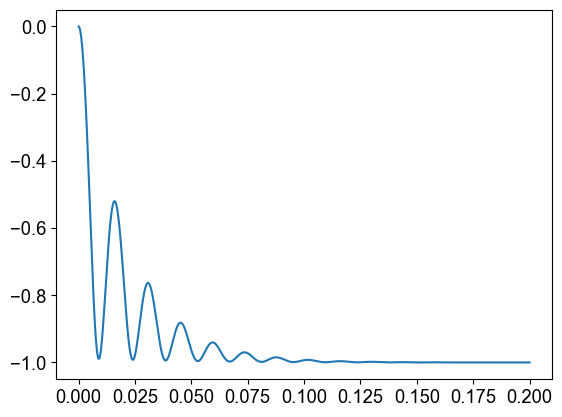

In [19]:
plt.plot(time_list[0], sz_list[0])

# Test 1 Large detuning

In [4]:
#############################################################
# Test 1: effect of inhomogeneous broadening
#############################################################

detunings = [[0,0],[0,100], [0,1000], [0,5000]]
num_ens = 2
N_total = 10000
theta_0 = 1
phi_0 = 0.0
coup_a_0 = 1.0
gamma_a_0 = 0.0
chi_a_0 = 0.0
kappa_c_0 = 100.0
t_max = 0.2
t_num = 60000
run = 0
det_dict = {}
handle_list = []
for i in range(len(detunings)):
    print(detunings[i])
    params = f'{num_ens} {N_total} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num}'
    handle = f'k{num_ens}N{N_total}det{detunings[i][1]}_{theta_0}_{coup_a_0}_{kappa_c_0}_{i+1}' # Add extra notes as needed
    det_dict[handle] = detunings[i]
    handle_list.append(handle)
    print(handle)


detuning_0 = [0]
num_ens = 1
N_total = 5000
params = f'{num_ens} {N_total} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num}'
handle = f'k{num_ens}N{N_total}det{0}_{theta_0}_{coup_a_0}_{kappa_c_0}_{5}' # Add extra notes as needed
det_dict[handle] = detuning_0
handle_list.append(handle)
print(f"************************* Run {5} *************************")
print(f"Handle: {handle} ")
print("\n")


print(handle_list)

[0, 0]
k2N10000det0_1_1.0_100.0_1
[0, 100]
k2N10000det100_1_1.0_100.0_2
[0, 1000]
k2N10000det1000_1_1.0_100.0_3
[0, 5000]
k2N10000det5000_1_1.0_100.0_4
************************* Run 5 *************************
Handle: k1N5000det0_1_1.0_100.0_5 


['k2N10000det0_1_1.0_100.0_1', 'k2N10000det100_1_1.0_100.0_2', 'k2N10000det1000_1_1.0_100.0_3', 'k2N10000det5000_1_1.0_100.0_4', 'k1N5000det0_1_1.0_100.0_5']


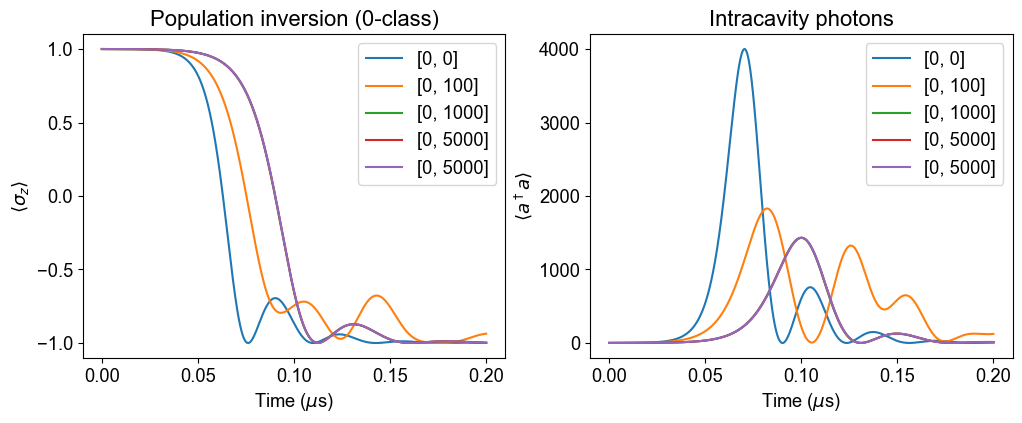

In [19]:
plot_good = True # Change to 1 once sure the result is good
results = [utils.read_results(handle) for handle in handle_list]

fig = plt.figure(figsize=(12,4.2))
ax = fig.subplots(1, 2)
ax[0].set_title("Population inversion (0-class)")
ax[0].set_xlabel(r"Time ($\mu$s)")
ax[0].set_ylabel(r"$\langle \sigma_z\rangle$")
ax[1].set_title("Intracavity photons")
ax[1].set_xlabel(r"Time ($\mu$s)")
ax[1].set_ylabel(r"$\langle a^\dagger a\rangle$")
for i in range(len(handle_list)-1):
    ax[0].plot(results[i][0], results[i][1][:,0], label=detunings[i])
    ax[1].plot(results[i][0], results[i][3], label=detunings[i])
ax[0].plot(results[0][0], results[-1][1], label=detunings[i])
ax[1].plot(results[0][0], results[-1][3], label=detunings[i])

ax[0].legend()
ax[1].legend()
if plot_good == True:
    fig.savefig("test1.pdf", dpi=300, pad_inches=0.2)

# Test 2: Propagation

In [ ]:
#############################################################
# Test 2: effect of inhomogeneous broadening (intermediate case)
#############################################################
max_det = 280
detunings = [[0,max_det],[0,max_det/2],[0,2*max_det/3],[0,max_det/2,max_det],
             [0,max_det/3], [0,max_det/3, max_det], 
             [0, 2*max_det/3], [0, 2*max_det/3, max_det]]
num_ens = 3
N_ens = 5000
theta_0 = 1
phi_0 = 0.0
coup_a_0 = 1.0
gamma_a_0 = 0.0
chi_a_0 = 0.0
kappa_c_0 = 100.0
t_max = 0.2
t_num = 60000
run = 0
det_dict = {}
handle_list = []

for i in range(len(detunings)):
    # np.savetxt(f"Detuning.dat", detunings[i], delimiter="\t")
    num_ens = len(detunings[i])
    params = f'{num_ens} {N_ens*num_ens} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num}'
    handle = f'k{num_ens}N{N_ens*num_ens}det{max_det}_{theta_0}_{coup_a_0}_{kappa_c_0}_{i+1}' # Add extra notes as needed
    det_dict[handle] = detunings[i]
    handle_list.append(handle)
    print(f"************************* Run {i+1} *************************")
    print(f"Handle: {handle} ")
    if os.path.isfile(f"Result_Sz_{handle}.dat") == False:
        utils.runcmd(f'file.exe {params} {handle}')
    else:
        print("File exits, skipping simulation")
    #utils.runcmd(f'file.exe {params} {handle}')
    print("\n")

In [ ]:
#############################################################
# Test 2: plot dW/dt
#############################################################
plot_good = True # Change to 1 once sure the result is good
results = [utils.read_results(handle) for handle in handle_list]
sz_list = [results[i][1] for i in range(len(handle_list))]
dt = results[0][0][-1]/np.size(results[0][0])
fig = plt.figure()
ax = fig.subplots(1, 1)
plt.figure(figsize=(6.5,4.2))
ax.set_title("Total atomic decay rate")
ax.set_ylabel(r"dW/dt")
ax.set_xlabel(r"Time ($\mu$s)")
labels = [r"[0,$\delta$]", r"[0,$\delta/3$]", r"[0,$\delta/3$, $\delta$]"]
run = 0
for i in [0,4,5]:
    W = utils.Wt(results[i][1])
    I = -utils.diffentiate(dt, W)
    print(detunings[i])
    ax.plot(results[0][0][:-1], I, label=labels[run])
    run += 1
    # ax.set_yscale('log')
ax.legend()
if plot_good == True:
    fig.savefig("test2_dwdt_3.pdf", dpi=300, pad_inches=0.2)

In [ ]:
#############################################################
# Test 2: plot sz[0]
#############################################################
plot_good = True # Change to 1 once sure the result is good
results = [utils.read_results(handle) for handle in handle_list]

fig = plt.figure()
ax = fig.subplots(1, 1)
plt.figure(figsize=(6.5,4.2))
ax.set_title("Population inversion (2nd class)")
ax.set_ylabel(r"$\Delta\langle\sigma_z\rangle$")
ax.set_xlabel(r"Time ($\mu$s)")
labels = [r"[0, $\delta$]",r"[0,$\delta/3$]",  r"[0,$\delta/3, \delta$]",
          r"[0,$\delta/2$]", r"[0,$\delta/2$, $\delta$]",
          r"[0,$2\delta/3$]", r"[0,$2\delta/3$, $\delta$]"]
run = 0
for i in [0,3,4,1,2,5,6]:
    ax.plot(results[0][0], results[i][1][:,1], label=labels[run])
    run += 1
    # ax.set_yscale('log')
ax.legend()
if plot_good == True:
    fig.savefig(f"test2_dsz2.pdf", dpi=300, pad_inches=0.2)

In [ ]:
#############################################################
# Test 2: plot sz[1]
#############################################################
plot_good = False # Change to 1 once sure the result is good

fig = plt.figure()
ax = fig.subplots(1, 1)
plt.figure(figsize=(6.5,4.2))
ax.set_title("Population inversion (2nd class)")
ax.set_ylabel(r"$\langle\sigma_z\rangle$")
ax.set_xlabel(r"Time ($\mu$s)")
labels = [r"[0,$\delta$]", r"[0,$\delta/3, \delta$]-[0,$\delta/3$]", r"[0,$\delta/2$, $\delta$]-[0, $\delta/2$]",
          r"[0,$2\delta/3$, $\delta$]-[0,$2\delta/3$]"]
run = 0
ax.plot(results[3][1][:,0]-results[1][1][:,0], label=labels[0])
ax.plot(results[5][1][:,0]-results[4][1][:,0], label=labels[1])
ax.plot(results[7][1][:,0]-results[6][1][:,0], label=labels[2])
ax.legend()
if plot_good == True:
    fig.savefig(f"test2_dsz.pdf", dpi=300, pad_inches=0.2)

# Test 3: critical detuning vs number of spins

In [ ]:
#############################################################
# Test 3: Find critical detuning
# Criterion 1: Td <1.05 Td(0)
# Criterion 2: sz_delta < -0.8
# System {-d, 0, d}
#############################################################
N_tot_range = np.linspace(20000, 800000, 40)[::-1].astype(int) # Start with the largest ensemble
num_ens = 3
theta_0 = 1
phi_0 = 0.0
coup_a_0 = 1.0
gamma_a_0 = 0.0
chi_a_0 = 0.0
kappa_c_0 = 100.0
t_max = 0.2
t_num = 60000
det_dict = {}
handle_list = []
delta_min = 0
delta_max = 375
delta_cur = delta_max # Temporary variable
cor_cri = 0.99
tol = 1e-3 # Tolerance 0.001
delta_crit = [] # Storing critical detunings satisfying crit

for N_tot in N_tot_range:
    # Run initial test to see if the current range is ok
    crit1 = 0
    found1 = False
    run = 0
    max_run = 10
    delta_min = 0
    delta_max = delta_cur # Smaller ensembles have smaller critical detuning
    
    # Initial check: crit1 fails at delta_max
    while(True):
        print(delta_max)
        detuning_max = [0, -delta_max, delta_max]
        np.savetxt("Detuning.dat", detuning_max, delimiter="\t")
        params = f'{num_ens} {N_tot} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num}'
        handle_max = f'k{num_ens}N{N_tot}det{delta_max}_{theta_0}_{coup_a_0}_{kappa_c_0}_test3'
        print(handle_max)
        # Check if file already exists
        if os.path.isfile(f"Result_Sz_{handle_max}.dat") == False:
            utils.runcmd(f'file.exe {params} {handle_max}')
        else:
            print("File exits, skipping simulation")
        # utils.runcmd(f'file.exe {params} {handle_max}')
        result = utils.read_results(handle_max)
        cor = np.corrcoef(result[1][:,0],result[1][:,1])[0][1]
        
        if np.abs(cor-cor_cri) < tol: # delta_max is the critical detuning for crit1
            delta_crit.append(delta_max)
            found1 = True
            delta_cur = delta_max
            print(f"delta_crit1 has been found at boundary {delta_max}")
            break
        elif cor < cor_cri:
            break
        elif cor > cor_cri: # delta_max is smaller than critical detuning for crit1
            delta_max += 100
            print(f"delta_max smaller than critical, increase by 100 to {delta_max}")
        # break (auto) delta_max is larger than critical detuning for crit 1
    
    # Start searching by binary
    while((found1== False) and run<max_run and delta_max-delta_min>5):
        run += 1
        delta_mid = int((delta_max + delta_min)/2)
        detuning_mid = [0, -delta_mid, delta_mid]
        np.savetxt("Detuning.dat", detuning_mid, delimiter="\t")   
        handle_mid = f'k{num_ens}N{N_tot}det{delta_mid}_{theta_0}_{coup_a_0}_{kappa_c_0}_test3' # Add extra notes as needed
        handle_list.append(handle_mid)
        det_dict[handle_mid] = detuning_mid
        print(f"************************* {N_tot} Run {run} Detuning {delta_mid} *************************")
        print(f"Handle: {handle_mid}")
        if os.path.isfile(f"Result_Sz_{handle_mid}.dat") == False:
            utils.runcmd(f'file.exe {params} {handle_mid}')
        else:
            print("File exits, skipping simulation")
        # utils.runcmd(f'file.exe {params} {handle_mid}')
        result = utils.read_results(handle_mid)
        cor = np.corrcoef(result[1][:,0],result[1][:,1])[0][1]
        if np.abs(cor - cor_cri) < tol:
            delta_crit.append(delta_mid)
            found1 = True
            delta_cur = delta_mid
            print(f"delta_crit1 has been found at run {run}: {delta_mid}, {cor}")
            break
        elif cor < cor_cri:
            delta_max = delta_mid
            print(f"Detuning {delta_mid} too large, {cor}, next round")
        elif cor > cor_cri:
            delta_min = delta_mid
            print(f"Detuning {delta_mid} too small, {cor}, next round")
    
    if found1 == False:
        delta_mid = int((delta_min + delta_max)/2)
        delta_crit.append(delta_mid)
        found1 = True
        delta_cur = delta_mid
        print(f"Unable to resolve within max_iter, settle at {delta_mid} with cor ~{cor}")

In [ ]:
N_tot = 50000
detuning_range = [50,100,200]
num_ens = 3
theta_0 = 1
phi_0 = 0.0
coup_a_0 = 1.0
gamma_a_0 = 0.0
chi_a_0 = 0.0
kappa_c_0 = 100.0
t_max = 0.15
t_num = 60000
handle_list1 = []

for i in range(len(detuning_range)):
    delta = detuning_range[i]
    detuning_set = [0, -delta, delta]
    np.savetxt(f"Detuning.dat", detuning_set, delimiter="\t")
    params = f'{num_ens} {N_tot} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num}'
    handle = f'k{num_ens}N{N_tot}det{delta}_{theta_0}_{coup_a_0}_{kappa_c_0}__test3' # Add extra notes as needed
    handle_list1.append(handle)
    print(f"************************* Run {i+1} *************************")
    print(f"Handle: {handle} ")
    if os.path.isfile(f"Result_Sz_{handle}.dat") == False:
        utils.runcmd(f'file.exe {params} {handle}')
    else:
        print("File exits, skipping simulation")
    # utils.runcmd(f'file.exe {params} {handle}')
    print("\n")

In [ ]:
results1 = [utils.read_results(handle) for handle in handle_list1]

In [ ]:
plot_save = True
fig, ax = plt.subplots(1,3,sharey=True, figsize=(15,4), gridspec_kw = {'wspace':0, 'hspace':0.08})

for i in range(3):
    ax[i].plot(results1[0][0], results1[i][1][:,0], label="0")
    ax[i].plot(results1[0][0], results1[i][1][:,1], label=r"$\pm\delta$")
    ax[i].set_xlabel(r"Time ($\mu$s)")
    ax[i].ticklabel_format(axis='x', style='sci', scilimits=(-2,-2))
    ax[i].legend()
ax[0].set_ylabel(r"$\langle \sigma_z\rangle$")
fig.subplots_adjust(bottom=0.2)
if plot_save:
    fig.savefig(f"test3_sz.pdf", dpi=300)
# plt.text(0.12,0.1, f"Correlation: {round(cor, 4)}")

In [ ]:

#from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

X = np.array(N_tot_range)
Y = np.array(delta_crit)

def quadratic_function(X, a, b, c):
    return a * X ** 2 + b * X + c

def logarithmic_function(X, a, b) :
    return a * np.log(X) + b

def hyperbola_function(x, a, b, c):
    return a / (x - b) + c

log_co, _ = curve_fit(logarithmic_function, X, Y)
quad_co, _ = curve_fit(quadratic_function, X, Y)
hyp_co, _ = curve_fit(hyperbola_function, X, Y)

print("Optimized parameters (log):", log_co)
print("Optimized parameters (quad):", quad_co)
print("Optimized parameters (hyper):", hyp_co)

def predict_Y_log(X):
    return logarithmic_function(X, *log_co)

def predict_Y_quad(X):
    return quadratic_function(X, *quad_co)

def predict_Y_hyp(X):
    return hyperbola_function(X, *hyp_co)

#print("R-squared:", r2_score(Y, predict_Y(X)))


In [ ]:
plt.scatter(N_tot_range, delta_crit, label="Data")
# plt.plot(N_tot_range, predict_Y_log(N_tot_range))
# plt.plot(N_tot_range, predict_Y_quad(N_tot_range))
plt.plot(N_tot_range, predict_Y_hyp(N_tot_range),label="Rational fit", color="#ff7f0e")
plt.ylabel(r"$\delta^*$(kHz)")
plt.xlabel("N_tot")
plt.legend()
plt.savefig(f"test3_fit.pdf", dpi=300, pad_inches=0.2)
# delta_crit
# plt.scatter(N_tot_range, delta_crit)
# plt.plot(N_tot_range, predict_Y(N_tot_range))

# Test 4: Symmetry

In [ ]:
#############################################################
# Test 4: system preparation
#############################################################
max_det = 250
detunings = [[0,-max_det, max_det], [0,max_det, max_det]]
num_ens = 3
N_tot = 50000 * num_ens
theta_0 = 1
phi_0 = 0.0
coup_a_0 = 1.0
gamma_a_0 = 0.0
chi_a_0 = 0.0
kappa_c_0 = 100.0
t_max = 0.2
t_num = 60000
det_dict = {}
handle_list = []

for i in range(len(detunings)):
    np.savetxt(f"Detuning.dat", detunings[i], delimiter="\t")
    params = f'{num_ens} {N_tot} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num}'
    handle = f'k{num_ens}N{N_tot}det{max_det}_{theta_0}_{coup_a_0}_{kappa_c_0}__test2_{i+1}' # Add extra notes as needed
    det_dict[handle] = detunings[i]
    handle_list.append(handle)
    print(f"************************* Run {i+1} *************************")
    print(f"Handle: {handle} ")
    # if os.path.isfile(f"Result_Sz_{handle}.dat") == False:
    #     utils.runcmd(f'file.exe {params} {handle}')
    # else:
    #     print("File exits, skipping simulation")
    utils.runcmd(f'file.exe {params} {handle}')
    print("\n")

In [ ]:
#############################################################
# Test 4: read results
#############################################################
results = [utils.read_results(handle) for handle in handle_list]

In [ ]:
#############################################################
# Test 4: plot sz
#############################################################
plot_save = True
fig, ax = plt.subplots(2,2,sharex=True, figsize=(15,8), gridspec_kw = {'wspace':0.12, 'hspace':0.08})

ax[0][0].set_ylabel(r"$\langle \sigma_z\rangle$")
ax[1][0].set_ylabel(r"$\langle \sigma_z\rangle$")
ax[0][1].set_ylabel(r"$\langle a^\dagger a\rangle$")
ax[1][1].set_ylabel(r"$\langle a^\dagger a\rangle$")
ax[1][0].set_xlabel(r"Time ($\mu$s)")
ax[1][1].set_xlabel(r"Time ($\mu$s)")
ax[0][1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))


t_ind = utils.cut_time(results[0][0], 0.08)
ax[0][0].plot(results[0][0][:t_ind], results[0][1][:,0][:t_ind], label=r"0")
ax[0][0].plot(results[0][0][:t_ind], results[0][1][:,1][:t_ind], label=r"$\pm\delta$")
ax[1][0].plot(results[0][0][:t_ind], results[1][1][:,0][:t_ind], label=r"0")
ax[1][0].plot(results[0][0][:t_ind], results[1][1][:,1][:t_ind], label=r"$\delta$")

ax[0][1].plot(results[0][0][:t_ind], results[0][3][:t_ind])
ax[1][1].plot(results[0][0][:t_ind], results[1][3][:t_ind])

ax[0][0].legend()
ax[1][0].legend()
ax[0][0].set_title("Population inversion")
ax[0][1].set_title("Intracavity photon")
if plot_save:
    fig.savefig(f"test4_sz.pdf", dpi=300, pad_inches=0.2)

# Test 5: shift frequency (3-ensemble)

In [5]:
#############################################################
# Test 3: Find critical detuning
# Criterion 1: Td <1.05 Td(0)
# Criterion 2: sz_delta < -0.8
# System {-d, 0, d}
#############################################################
N_tot = 300000
shifts = np.linspace(0,600,20)
# shifts = [300, 600]
num_ens = 3
theta_0 = 1
phi_0 = 0.0
coup_a_0 = 1.0
gamma_a_0 = 0.0
chi_a_0 = 0.0
kappa_c_0 = 100.0
t_max = 0.2
t_num = 60000
det_dict = {}
handle_list = []
delta_min = 100
delta_max = 450
delta_cur = delta_max # Temporary variable
cor_cri = 0.99
tol = 1e-3 # Tolerance 0.001
delta_crit = [] # Storing critical detunings satisfying crit

for shift in shifts:
    # Run initial test to see if the current range is ok
    crit1 = 0
    found1 = False
    run = 0
    max_run = 10
    delta_min = 0
    delta_max = delta_cur # Larger shifts have smaller critical detuning
    
    # Initial check: crit1 fails at delta_max
    while(True):
        detuning_max = [shift, -delta_max + shift, delta_max + shift]
        print(detuning_max)
        np.savetxt("Detuning.dat", detuning_max, delimiter="\t")
        params = f'{num_ens} {N_tot} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num}'
        handle_max = f'k{num_ens}N{N_tot}det{delta_max}D{shift}_{theta_0}_{coup_a_0}_{kappa_c_0}_test5'
        print(handle_max)
        # Check if file already exists
        if os.path.isfile(f"Result_Sz_{handle_max}.dat") == False:
            utils.runcmd(f'file.exe {params} {handle_max}')
        elif (np.size(np.loadtxt(f"Result_Sz_{handle_max}.dat", dtype=np.longdouble)[:,0])<19999):
            utils.runcmd(f'file.exe {params} {handle_max}')
        else:
            print("File exits, skipping simulation")
        # utils.runcmd(f'file.exe {params} {handle_max}')
        result = utils.read_results(handle_max)
        cor = np.corrcoef(result[1][:,0],result[1][:,1])[0][1]
        
        if np.abs(cor-cor_cri) < tol: # delta_max is the critical detuning for crit1
            delta_crit.append(delta_max)
            found1 = True
            delta_cur = delta_max
            print(f"delta_crit1 has been found at boundary {delta_max}, {cor}")
            break
        elif cor < cor_cri:
            break
        elif cor > cor_cri: # delta_max is smaller than critical detuning for crit1
            delta_max += 100
            print(f"delta_max smaller than critical, increase by 100 to {delta_max}")
        # break (auto) delta_max is larger than critical detuning for crit 1
    
    # Start searching by binary
    while((found1== False) and run<max_run and delta_max-delta_min>5):
        run += 1
        delta_mid = int((delta_max + delta_min)/2)
        detuning_mid = [shift, -delta_mid + shift, delta_mid + shift]
        np.savetxt("Detuning.dat", detuning_mid, delimiter="\t")   
        handle_mid = f'k{num_ens}N{N_tot}det{delta_mid}D{shift}_{theta_0}_{coup_a_0}_{kappa_c_0}_test3' # Add extra notes as needed
        handle_list.append(handle_mid)
        det_dict[handle_mid] = detuning_mid
        print(f"************************* {N_tot} Run {run} Detuning {delta_mid} *************************")
        print(f"Handle: {handle_mid}")
        if os.path.isfile(f"Result_Sz_{handle_mid}.dat") == False:
            utils.runcmd(f'file.exe {params} {handle_mid}')
        elif (np.size(np.loadtxt(f"Result_photon_{handle_max}.dat", dtype=np.longdouble))<19999):
            utils.runcmd(f'file.exe {params} {handle_max}')
        else:
            print(np.size(np.loadtxt(f"Result_photon_{handle_max}.dat", dtype=np.longdouble)))
            print("File exits, skipping simulation")
        # utils.runcmd(f'file.exe {params} {handle_mid}')
        result = utils.read_results(handle_mid)
        cor = np.corrcoef(result[1][:,0],result[1][:,1])[0][1]
        if np.abs(cor - cor_cri) < tol:
            delta_crit.append(delta_mid)
            found1 = True
            delta_cur = delta_mid
            print(f"delta_crit1 has been found at run {run}: {delta_mid}, {cor}")
            break
        elif cor < cor_cri:
            delta_max = delta_mid
            print(f"Detuning {delta_mid} too large, {cor}, next round")
        elif cor > cor_cri:
            delta_min = delta_mid
            print(f"Detuning {delta_mid} too small, {cor}, next round")
    
    if found1 == False:
        delta_mid = int((delta_min + delta_max)/2)
        delta_crit.append(delta_mid)
        found1 = True
        delta_cur = delta_mid
        print(f"Unable to resolve within max_iter, settle at {delta_mid} with cor ~{cor}")

[0.0, -450.0, 450.0]
k3N300000det450D0.0_1_1.0_100.0_test5
File exits, skipping simulation
************************* 300000 Run 1 Detuning 225 *************************
Handle: k3N300000det225D0.0_1_1.0_100.0_test3
19999
File exits, skipping simulation
delta_crit1 has been found at run 1: 225, 0.9900098519530041
[31.57894736842105, -193.42105263157896, 256.57894736842104]
k3N300000det225D31.57894736842105_1_1.0_100.0_test5
File exits, skipping simulation
delta_max smaller than critical, increase by 100 to 325
[31.57894736842105, -293.42105263157896, 356.57894736842104]
k3N300000det325D31.57894736842105_1_1.0_100.0_test5
File exits, skipping simulation
************************* 300000 Run 1 Detuning 162 *************************
Handle: k3N300000det162D31.57894736842105_1_1.0_100.0_test3
19999
File exits, skipping simulation


ValueError: the number of columns changed from 3 to 2 at row 15084; use `usecols` to select a subset and avoid this error

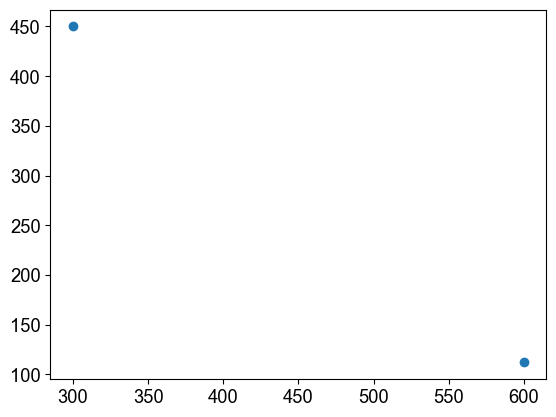

In [6]:
plt.scatter(shifts, delta_crit, label="Data")